# Causal Discovery Toolbox

In [1]:
import cdt
import networkx as nx
import matplotlib.pyplot as plt

from cdt.metrics import precision_recall, SID, SHD

No GPU automatically detected. Setting SETTINGS.GPU to 0, and SETTINGS.NJOBS to cpu_count.
sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.


Load a dataset for which we know the real graph structure.

In [2]:
data, graph = cdt.data.load_dataset('sachs')

In [3]:
data.head()

,praf,pmek,plcg,PIP2,PIP3,p44/42,pakts473,PKA,PKC,P38,pjnk
0,26.4,13.2,8.82,18.30,58.80,6.61,17.0,414.0,17.00,44.9,40.0
1,35.9,16.5,12.30,16.80,8.13,18.60,32.5,352.0,3.37,16.5,61.5
2,59.4,44.1,14.60,10.20,13.00,14.90,32.5,403.0,11.40,31.9,19.5
3,73.0,82.8,23.10,13.50,1.29,5.83,11.8,528.0,13.70,28.6,23.1
4,33.7,19.8,5.19,9.73,24.80,21.10,46.1,305.0,4.66,25.7,81.3


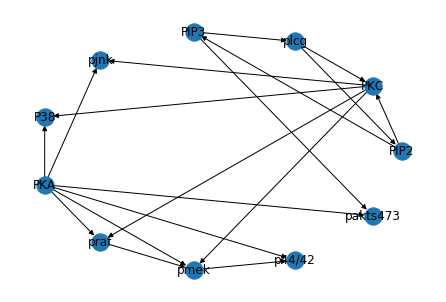

In [4]:
nx.draw_shell(graph, with_labels=True)

## Skeleton inference

Let's assume we're working from data alone, with unknown graph structure. We can recover the skeleton of graph by examining conditional dependencies.

In [5]:
glasso = cdt.independence.graph.Glasso()
skeleton = glasso.predict(data)

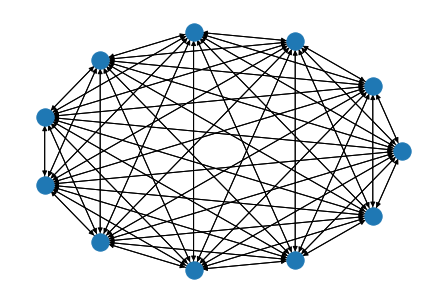

In [6]:
nx.draw_shell(skeleton)

This is very dense. We can remove indirect links with the Aracne algorithm.

In [7]:
new_skeleton = cdt.utils.graph.remove_indirect_links(skeleton, alg='aracne')

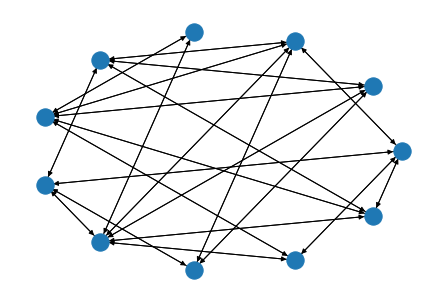

In [8]:
nx.draw_shell(new_skeleton)

## Causal discovery

Now that we have a skeleton to work with, we can perform causal discovery. We'll use the GES (greedy equivalence search) algorithm, using the skeleton as a constraint. To use this, we need to install R.

In [9]:
model = cdt.causality.graph.GES()
output_graph = model.predict(data, new_skeleton)

GES is ran on the skeleton of the given graph.


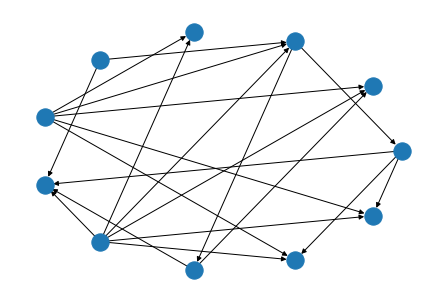

In [10]:
nx.draw_shell(output_graph)

## Evaluation

We have recovered a causal graph, but how close is it to the true causal graph? We can compute some metrics. There are three in the `cdt.metrics` module:
* AUPRC (area under the pr curve)
* structural hamming distance (SHD)
* structural intervention distance (SID)

In [11]:
scores = [metric(graph, output_graph)
          for metric in (precision_recall, SID, SHD)]
scores

[(0.46354453627180897,
  [(0.1487603305785124, 1.0), (0.4, 0.4444444444444444), (1.0, 0.0)]),
 array(64.),
 22]

Now we'll replace our causal discovery method. Let's use CAM (causal additive models) instead. This does not require using a skeleton.

In [ ]:
lingam_model = cdt.causality.graph.LiNGAM()
lingam_output_graph = lingam_model.predict(data, )
lingam_scores = [metric(graph, lingam_output_graph)
              for metric in (precision_recall, SID, SHD)]
lingam_scores, nx.draw_shell(lingam_output_graph, with_labels=True)

In [ ]:
ccdr_model = cdt.causality.graph.CCDr()
ccdr_output_graph = ccdr_model.predict(data, )
ccdr_scores = [metric(graph, ccdr_output_graph)
              for metric in (precision_recall, SID, SHD)]
ccdr_scores, nx.draw_shell(ccdr_output_graph, with_labels=True)

## Review

Overall, I'd say these methods are not doing a very good job of recovering the input causal structure. Perhaps the neural network based methods can do better?